In [218]:
import numpy as np
import pandas as pd
import random
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [219]:
a = 1
M = 1
N = 400

m = M/N
Vsphere = 4*np.pi/3*a**3
rho0 = M/Vsphere

# P(r) = 3*r^3/(a^3)
# r(P) = a(P/3)^(1/3)

cdf_r = np.random.uniform(0,1,N)
r = a*(cdf_r)**(1/3)

# P(theta) = (1 - cos(theta))/2
# theta(P) = cos^(-1)(1 - 2P)

cdf_theta = np.random.uniform(0,1,N)
theta = np.arccos(1 - 2*cdf_theta)

phi = np.random.uniform(0,2*np.pi,N)

In [220]:
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta) 

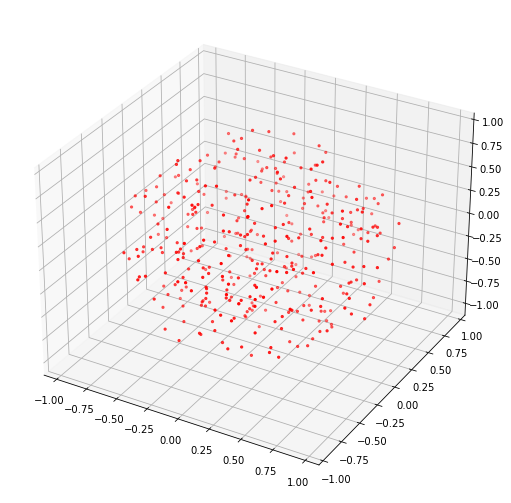

In [221]:
# Generating 3D plot

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = 'r', marker='.')
ax.set_aspect('auto')
plt.show()

In [222]:
test_frac = 100
Vtest = Vsphere/ test_frac

def VolumeTest(Vtest, r, theta, phi):
    
    # Uniform generation of the coordinates, otherwise it is a tautology
    r_test = np.random.uniform(0,a, 2)
    theta_test = np.random.uniform(0,np.pi, 2)
    phi1 = np.random.uniform(0,2*np.pi)
    
    # Sorting 
    r1 = r_test.min()
    r2 = r_test.max()
    theta1 = theta_test.min()
    theta2 = theta_test.max()
    
    ftheta = 0.5*(- theta1 + np.sin(theta1)*np.cos(theta1) + theta2 - np.sin(theta2)*np.cos(theta2))
    
    phi2 = phi1 + 3*Vtest/(ftheta * (r2-r1)**3)

    # Check which points lie within the volume
    enclosed_points = ((r >= r1) & (r <= r2) & (theta >= theta1) & (theta <= theta2) & (phi >= phi1) & (phi <= phi2))

    # Count the number of enclosed points
    num_enclosed_points = np.sum(enclosed_points)
    
    return num_enclosed_points

4.0
12.2984


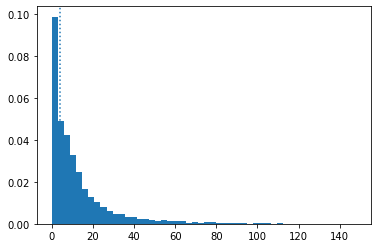

In [223]:
Ntest = 10000
bodies_number_array = np.array([VolumeTest(Vtest, r, theta, phi) for i in range(Ntest)])

expected_bodies = N/Vsphere*Vtest
mean = np.mean(bodies_number_array)

print(expected_bodies)
print(mean)

plt.hist(bodies_number_array, 50, density=True)
plt.axvline(expected_bodies, ls='dotted')
plt.show()

# Creating initial conditions file

In [224]:
# open the file
file = open('homogeneous_sphere_initial.txt', 'w')

# write to the file
file.write(f'{N}\n')
file.write('0\n')
for i in range(N):
    file.write(f'{m} {x[i]} {y[i]} {z[i]} {0} {0} {0}\n')

# close the file
file.close()

In [225]:
dyn_time = np.sqrt(3*np.pi/(16*rho0))
ff_time = np.sqrt(3*np.pi/(32*rho0))

print("The dynamical time is",dyn_time)
print("The free fall time is",ff_time)

print(10*dyn_time)

The dynamical time is 1.5707963267948963
The free fall time is 1.1107207345395915
15.707963267948964


In [226]:
# We run the following line in the terminal
os.system('time ./nbody_sh1 -d 0.03 -o 0.01 -t 1.8707963267948963 < homogeneous_sphere_initial.txt > output_sphere.out')

Starting a Hermite integration for a 400-body system,
  from time t = 0 with time step control parameter dt_param = 0.03  until time 1.8708 ,
  with diagnostics output interval dt_dia = 1,
  and snapshot output interval dt_out = 0.01.
at time t = 0 , after 0 steps :
  E_kin = 0 , E_pot = -0.60699 , E_tot = -0.60699
                absolute energy error: E_tot - E_init = 0
                relative energy error: (E_tot - E_init) / E_init = -0
at time t = 1.00001 , after 45159 steps :
  E_kin = 1.52565 , E_pot = -2.13264 , E_tot = -0.606997
                absolute energy error: E_tot - E_init = -6.99766e-06
                relative energy error: (E_tot - E_init) / E_init = 1.15285e-05
774.27user 0.30system 12:54.68elapsed 99%CPU (0avgtext+0avgdata 3840maxresident)k
0inputs+19024outputs (0major+165minor)pagefaults 0swaps


0

# Read the data

In [199]:
# Read file
data = pd.read_csv('output_sphere.out').to_numpy()

In [200]:
times = data[0::(N+2)].astype(float)

m = {}

for i in range(1, N + 1):
    
    m[f"{i}"]= data[i::(N+2)]
    

In [201]:
# produce a split array: 

m_data = {}

for j in range(1, N + 1):

    m_data[f"{j}"] = np.array([m[f"{j}"][i][0].split() for i in range(0, len(m[f"{j}"]))]).astype(float)

In [202]:
times_plot = np.hstack(times)

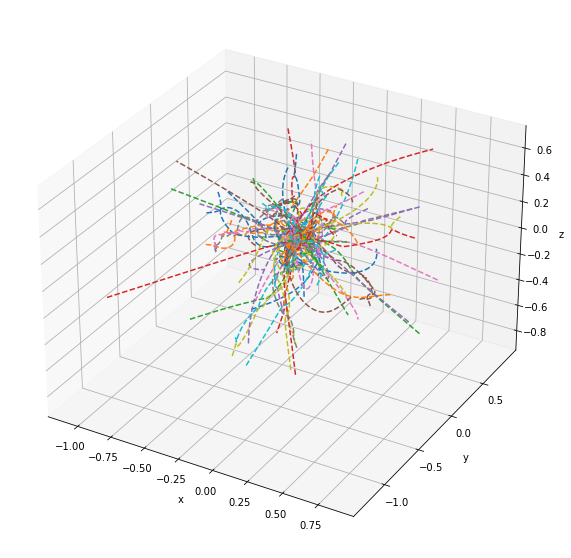

In [203]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,10))

for i in range(1, N + 1):

    ax.plot(m_data[f"{i}"][:, 1], m_data[f"{i}"][:, 2], m_data[f"{i}"][:, 3], label=f"{i}th particle", linestyle='--')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_aspect('auto')

plt.show()

In [204]:
r = {}

for i in range(1, N + 1):  
    r[f"{i}"] = np.sqrt(m_data[f"{i}"][:, 1]**2 + m_data[f"{i}"][:, 2]**2 + m_data[f"{i}"][:, 3]**2)
    
#print(list(r.values())[0])

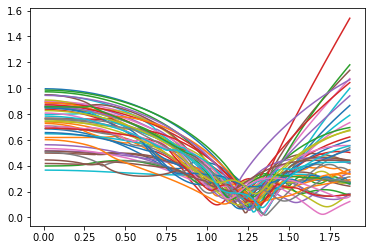

In [205]:
for i in range(1, N + 1):

    plt.plot(times_plot, r[f"{i}"][:])

    
plt.show()

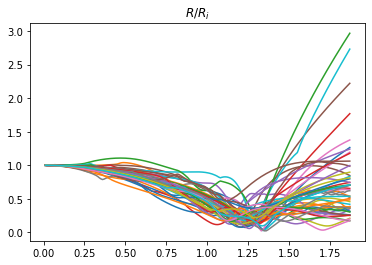

In [206]:
radius = np.zeros((N, len(times)))
for i in range(1, N + 1):

    plt.plot(times_plot, r[f"{i}"][:]/r[f"{i}"][0])
    radius[i-1] = r[f"{i}"][:]/r[f"{i}"][0]

plt.title("$R/R_i$")
plt.show()

0.25050456760551304 [1.27001978]


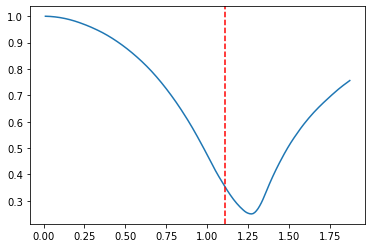

In [207]:
R = np.zeros(len(times))
R = np.sum(radius, axis = 0)/N
plt.plot(times, R)
plt.axvline( x = ff_time, color='r', linestyle='--')
print(R.min() , times[R.argmin()])

In [208]:
index_r_max = []

for i in range(1, N+1):
    index_r_max.append(np.argmax(r[f"{i}"][:]))

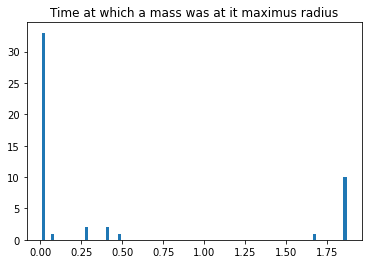

In [209]:
time_r_max = []

for i in range(0,N):
    time_r_max.append(times_plot[index_r_max[i]])

plt.title("Time at which a mass was at it maximus radius")
plt.hist(time_r_max,100)
plt.show()